## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2021)

Pekka Marttinen, Santosh Hiremath, Tianyu Cui, Yogesh Kumar, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Shaoxiong Ji, Alexander Nikitin, Sebastiaan De Peuter, Joakim Järvinen.

## Exercise 2, due on Tuesday February 2 at 23:00.

### Contents
1. Problem 1: Computing conditional probability
2. Problem 2: Conditional independence from Bayesian network
3. Problem 3: Burden of specification
4. Problem 4: Medical diagnosis



## Problem 1: Computing conditional probability

Consider the Bayesian network in figure below which represents Mr Holmes’ burglary worries: (B)urglar, (A)larm, (W)atson, Mrs (G)ibbon. All variables are binary with states $\{\mathsf{tr}, \mathsf{fa}\}$. 

![figure title](holmes_dag.png)

The probabilities are

\begin{align*}
    p(B = \mathsf{tr}) &= 0.01 && \\
    p(A = \mathsf{tr}|B = \mathsf{tr}) &= 0.99 & p(A = \mathsf{tr}|B = \mathsf{fa}) &= 0.05 \\
    p(W = \mathsf{tr}|A = \mathsf{tr}) &= 0.90 & p(W = \mathsf{tr}|A = \mathsf{fa}) &= 0.5 \\
    p(G = \mathsf{tr}|A = \mathsf{tr}) &= 0.7  & p(G = \mathsf{tr}|A = \mathsf{fa}) &= 0.2 \\
\end{align*}
Compute the conditional probabilities

__(a)__ \\(p(B = \mathsf{tr}|W = \mathsf{tr})\\)

__(b)__ \\(p(B = \mathsf{tr}|W = \mathsf{tr}, G = \mathsf{fa})\\)

Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```!(imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally! You can use some of the definitions from the exercise description as a reference. The list of valid Latex commands in Jypyter notebook can be found here: http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm


YOUR ANSWER HERE
According to know probabilities, we have
\begin{align*}
    p(B = \mathsf{fa}) &= 0.99 && \\
    p(A = \mathsf{fa}|B = \mathsf{tr}) &= 0.01 & p(A = \mathsf{fa}|B = \mathsf{fa}) &= 0.95 \\
    p(W = \mathsf{fa}|A = \mathsf{tr}) &= 0.10 & p(W = \mathsf{fa}|A = \mathsf{fa}) &= 0.5 \\
    p(G = \mathsf{fa}|A = \mathsf{tr}) &= 0.3  & p(G = \mathsf{fa}|A = \mathsf{fa}) &= 0.8 \\
\end{align*}

(a)

\begin{align}
P(B=tr|W=tr)&=\frac{P(B=t r, W=t r)}{P(W=t r)}\\
&=\frac{\sum_{a\in \{t r, f a\}} \sum_{g\in \{t r, f a\}} P(B=t r, W=t r, A=a, G=g)}{\sum_{a\in \{t r, f a\}} \sum_{b\in \{t r, f a\}} \sum_{g\in \{t r, f a\}} P(B=b, W=t r, A=a, G=g)}\\
&=\frac{\sum_{a\in \{t r, f a\}} \sum_{g\in \{t r, f a\}} P(B=t r)  P(A=a \mid B=t r)  P(G=g \mid A=a)  P(W=\operatorname{tr} \mid A=a)}{\sum_{a\in \{t r, f a\}} \sum_{b\in \{t r, f a\}} \sum_{a\in \{t r, f a\}} P(B=b)  P(A=a \mid B=b)  P(G=g \mid A=a)  P(W=\operatorname{tr} \mid A=a)}\\
&=\frac{0.01\times(0.99\times0.7\times 0.9+0.01 \times 0.2 \times 0.5+0.99\times0.3\times0.9+0.01\times 0.8\times 0.5)}{0.01\times (0.99\times 0.7\times 0.9+0.01 \times 0.2 \times 0.5+0.99\times0.3\times0.9+0.01\times 0.8\times 0.5)+0.99\times(0.05\times0.7\times0.9+0.95\times0.2\times0.5+0.05\times0.2\times0.5+0.95\times0.8\times0.5)}\\
&\approx 0.0171
\end{align}

(b)
\begin{align*}
p(B = \mathsf{tr}|W = \mathsf{tr}, G = \mathsf{fa})&=\frac{P(B=t r, W=t r, G=f a)}{P(W=t r, G=f a)}\\
&=\frac{\sum_{a\in\{tr,fa\}} P(B=t r, W=t r, A=a, G=f a)}{\sum_{a\in\{tr,fa\}} \sum_{b\in\{tr,fa\}} P(B=b, W=t r, A=a, G=f a)}\\
&=\frac{\sum_{a\in\{tr,fa\}} P(B=t r)  P(A=a \mid B=t r)  P(G=f a \mid A=a)  P(W=t r \mid A=a)}{\sum_{a\in\{tr,fa\}} \sum_{b\in\{tr,fa\}} P(B=b)  P(A=a \mid B=b)  P(G=f a \mid A=a)  P(W=\operatorname{tr} \mid A=a)}\\
&=\frac{0.01\times(0.99\times0.3\times0.9+0.01\times0.8\times0.5)}{0.01\times(0.99\times0.3\times0.9+0.01\times0.8\times0.5)+0.99
\times(0.05\times0.3\times0.9+0.95\times0.8\times0.5)}\\
&\approx 0.06916
\end{align*}

## Problem 2: Conditional independence from Bayesian network

Based on the Bayesian network in [figure](markov.png) below, which of the following conditional independence statements follow? 
For each statement, give a ''true/false'' answer; for the false statements, also mention a path between the two nodes that is not blocked. (see [Barber: Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online),ch. 3.3.4)

![markov](markov.png)
\
\begin{align}
(a)\ \ A \perp\!\!\!\perp  B \mid C && (c)\ \ C \perp\!\!\!\perp E \mid B,D &&(e)\ \ B \perp\!\!\!\perp F \mid A,C\\
(b)\ \ A \perp\!\!\!\perp B \mid \emptyset && (d)\ \ C \perp\!\!\!\perp D \mid A,B &&(f)\ \ A \perp\!\!\!\perp E \mid D,F
\end{align}

Furthermore, find a Bayesian network that is *Markov equivalent* to the network in the above [figure](markov.png). (see [Barber: Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online),ch. 3.3.6)

Write your solution in LateX or attach a picture of the solution in the cell below.


\begin{aligned}
&(a) \text{False, C is a collider between A and B, a path between the two nodes that is not blocked should be } A \rightarrow C \leftarrow B \\
&(b) \text{True.} \\
&(c) \text{False, a path between the two nodes that is not blocked should be } C\leftarrow A \leftarrow F \rightarrow E \\
&(d) \text{False, a path between the two nodes that is not blocked should be } C\rightarrow D.\\
&(e) \text{True.}\\
&(f) \text{False, a path between the two nodes that is not blocked should be } A\rightarrow C \rightarrow D \rightarrow E.
\end{aligned}

THe Markov equivalent network should be:

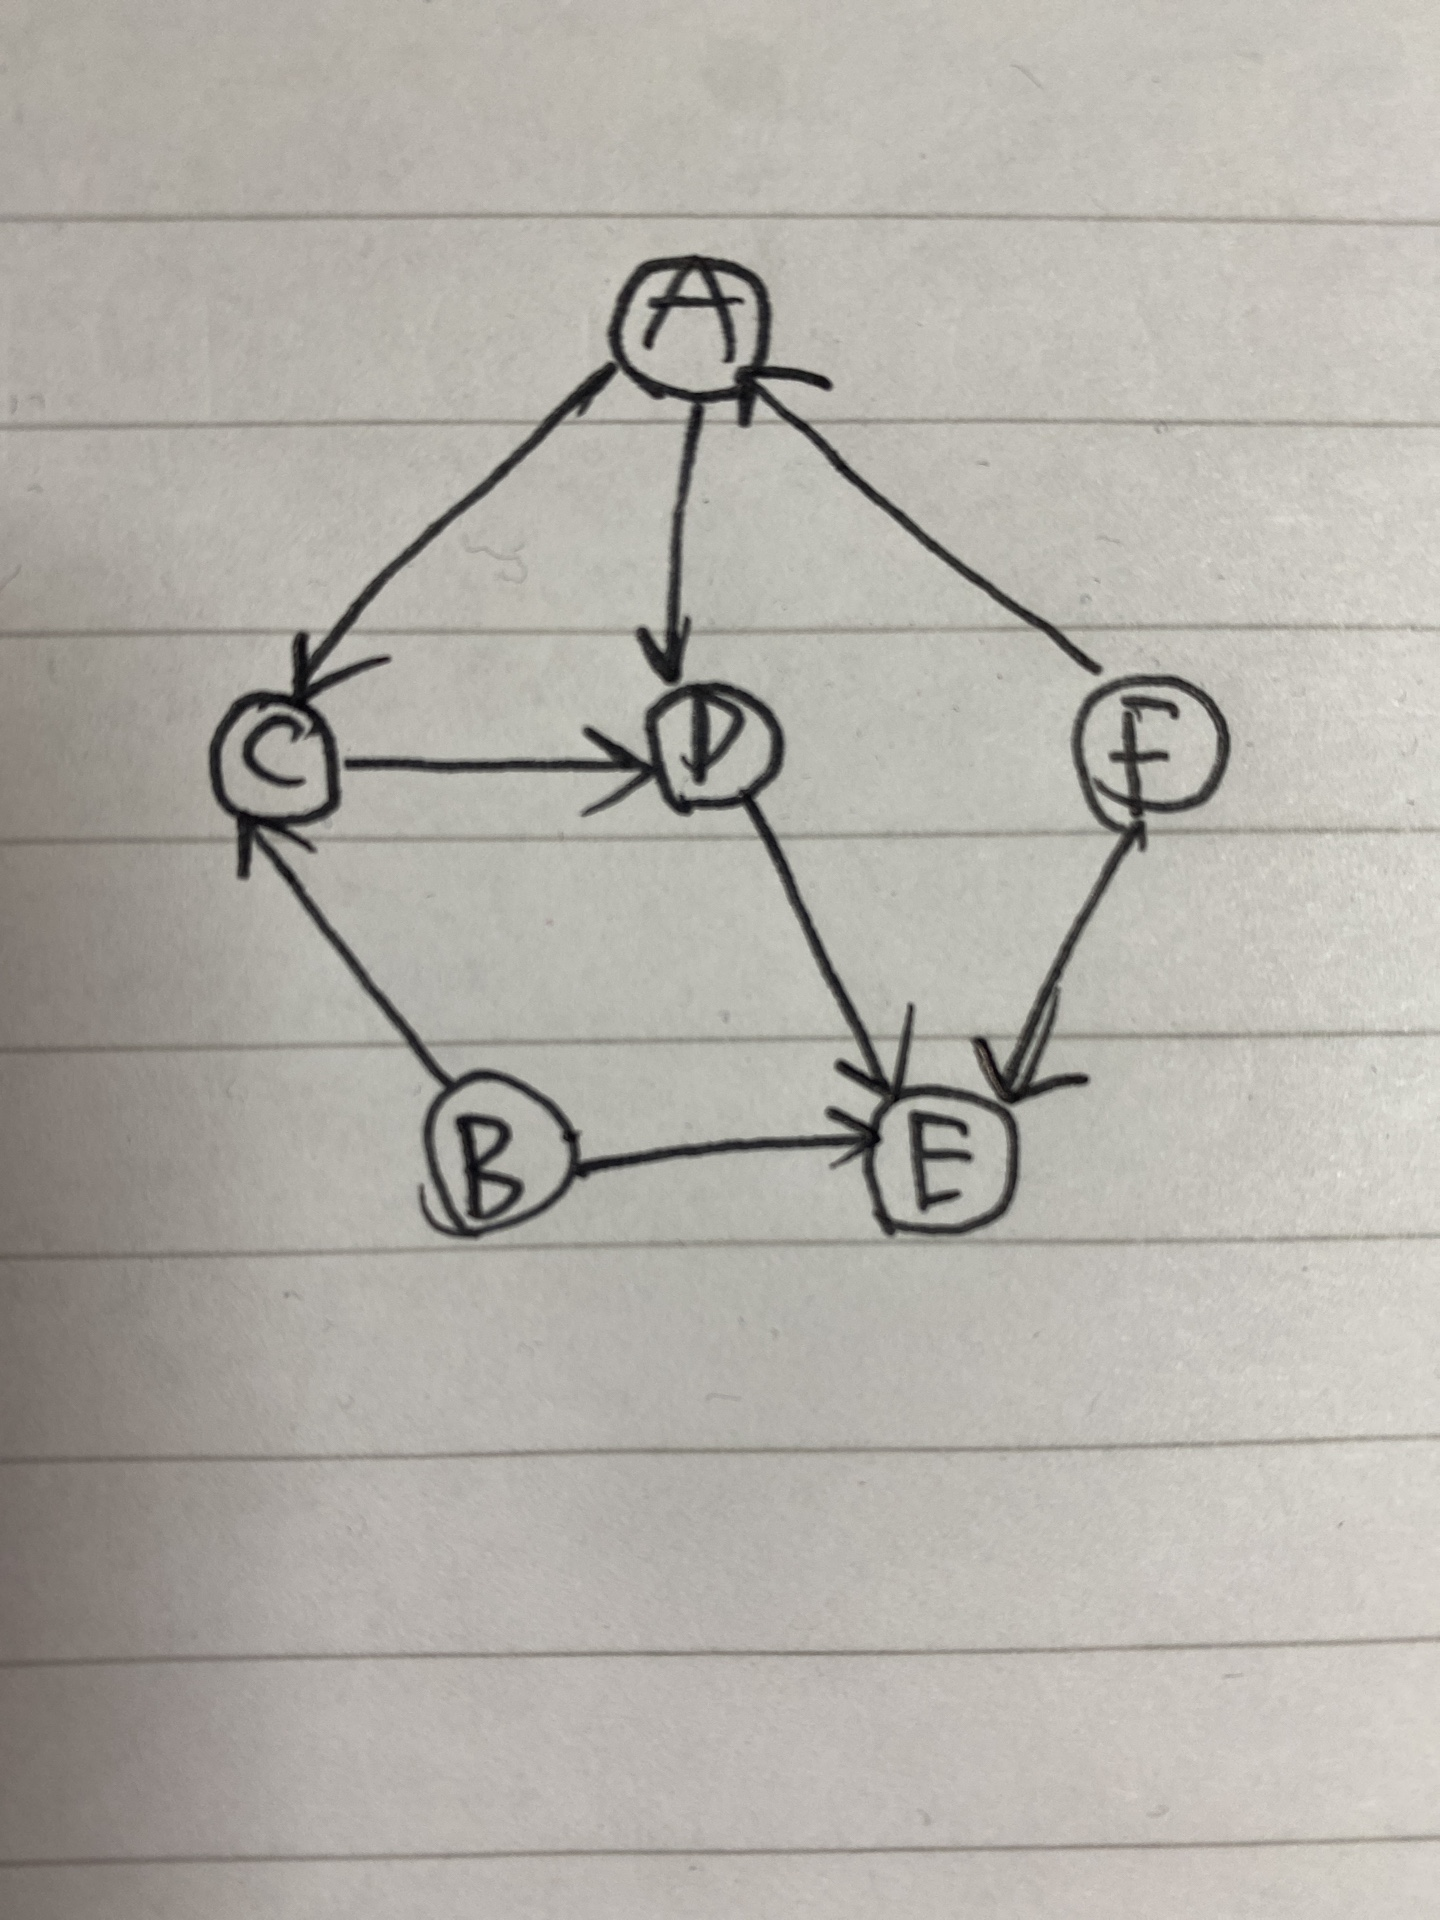

## Problem 3: Burden of specification

Consider a distribution of five binary variables $x_i$.

__(a)__ What is the number of parameters needed to define the distribution $p(x_1,x_2,x_3,x_4,x_5)$ if no assumptions are made, i.e. $p$ is an arbitrary distribution.

__(b)__ How about if the Bayesian network in [figure](chain.png) below is assumed, i.e. $p$ factorizes as implied by the graph. 

__(c)__ And how about if, additionally to (b), we assume that the conditional distributions are shared, i.e. $p(x_{i+1}\mid x_i)=p(x_{i}\mid x_{i-1})$, $i=2,3,4$?

![figure](chain.png)

Write your solution in LateX or attach a picture of the solution in the cell below.


(a) The number of parameters is $2^5-1=31$ parameters needed to define the distribution $P\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}\right)$.

(b) $P\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}\right)=P(x_1)P(x_2|x_1)P(x_3|x_2)P(x_4|x_3)P(x_5|x_4)$
$P(x_1)$ has two parameters, and for each $P(x_i|x_j)$ which is a probability of an unknown $x_i$ given a previously known $x_i$, and the last parameter is fixed becaus the sum of probabilities is 1. Hence the number of parameters should be 
$$
2\times 5-1=9.
$$

(c) Assume that the conditional distributions are shared, we have P(x_2|x_1)=P(x_3|x_2)=P(x_4|x_3)=P(x_5|x_4), and therefore
$P\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}\right)=P(x_1)P(x_2|x_1)^4$. Thenw we have the number of parameters should be
$$
2\times 2-1=3.
$$

## Problem 4: Medical diagnosis

Let's have the following notation:

| Notation    | Explanation                                      |
|-------------|--------------------------------------------------|
| $A = 1$<br> | A person has brain cancer                        |
| $B = 1$     | A person has a high blood calcium level          |
| $C = 1$     | A person has a brain tumor                       |
| $D = 1$     | A person has seizures that cause unconsciousness |
| $E = 1$     | A person has severe headaches                    |


An expert has told us the following information about the relationships between variables:

>Probability of severe headaches $P(E = 1)$ depends only on the fact whether a person has a brain tumor ($C$) or not. On the other hand, if one knows the blood calcium level ($B$) and whether the person has a tumor or not ($C$), one can specify the probability of unconsciousness seizures $P(D = 1)$. In this case, the probability of $D$ doesn't depend on the presence of the headaches ($E$) or (directly) on the fact whether the person has brain cancer or not  ($A$). The probability of a brain tumor ($C$) depends directly only on the fact, whether the person has brain cancer or not ($A$).

Construct a DAG which represents (exactly) the causal statements specified by the expert.
Furthemore, write down the conditional independencies corresponding the description of the expert and verify that this conforms with those implied by the DAG.
Finally, write down the joint distribution $P(A, B, C, D, E)$ factorized according to the DAG.

Write your solution in LateX or attach a picture of the solution in the cell below.


YOUR ANSWER HERE
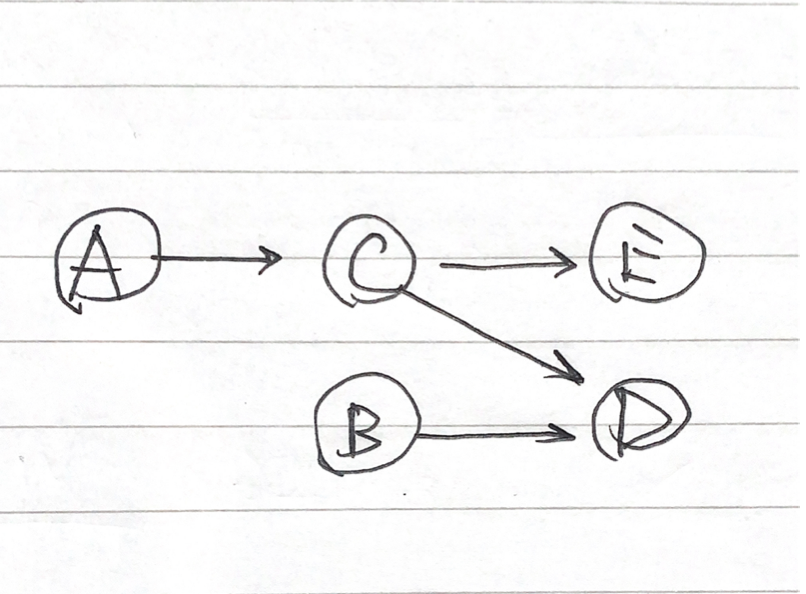

The joint distribution factorized according to the DAG is: 
$$
P(A, B, C, D, E)=P(A) P(B) P(C \mid A) P(D \mid B, C) P(E \mid C).
$$